In [142]:
import os

In [143]:
def extract_data(root):
    result_dict = {}  # Create an empty dictionary to store the results
    # Walk through all directories and subdirectories
    for folder, subdirs, files in os.walk(root):
        if os.path.basename(folder).startswith("o3cpu"):
            # Check if 'terminaloutput.txt' is not in the list of files in the folder
            if "terminaloutput.txt" in files or "terminaloutput.txt" not in files:
                # open the "stats.txt" file and read the last line
                with open(os.path.join(folder, "stats.txt")) as f:
                    overallMisses = 0
                    # read all lines into a list
                    lines = f.readlines()
                    for line in lines:
                        if "simSeconds" in line:
                            # extract the simSeconds value from the line
                            simSeconds = float(line.split()[1])
                        if "system.cpu.numCycles" in line:
                            # extract the numCycles value from the line
                            numCycles = int(line.split()[1])
                        if "system.cpu.branchPred.condPredicted" in line:
                            # extract the conditional predicted branches value from the line
                            condPredicted = int(line.split()[1])
                        if "system.cpu.branchPred.condIncorrect" in line:
                            # extract the conditional incorrect branches value from the line
                            condIncorrect = int(line.split()[1])
                        if "system.cpu.commit.branchMispredicts" in line:
                            # extract the branch mispredicts value from the line
                            branchMispredicts = int(line.split()[1])
                        if "overallMisses::total" in line:
                            # extract the overall misses value from the line
                            overallMisses += int(line.split()[1])
                result_dict[os.path.basename(folder)] = {"Seconds": simSeconds, "Cycles": numCycles, "Conditional Predicted": condPredicted,
                                                         "Conditional Incorrect": condIncorrect, "Branch Mispredicts": branchMispredicts,
                                                         "Overall Cache Misses": overallMisses}  # Create an empty dictionary for the folder

    return result_dict

In [144]:
data = extract_data(".")

# print data in a table
print("Benchmark\tSeconds\t\tCycles\t\tConditional Predicted\tConditional Incorrect\tBranch Mispredicts\tOverall Cache Misses")
for key, value in data.items():
    print("{}\t\t{}\t\t{}\t\t{}\t\t\t\t{}\t\t\t\t{}\t\t\t\t{}".format(key.split("-")[2], value["Seconds"], value["Cycles"], value["Conditional Predicted"],
                                                                         value["Conditional Incorrect"], value["Branch Mispredicts"],
                                                                         value["Overall Cache Misses"]))

Benchmark	Seconds		Cycles		Conditional Predicted	Conditional Incorrect	Branch Mispredicts	Overall Cache Misses
tage		2.197581		2197580504		195777696				771585				771121				14925645
localBP		0.008116		8116491		863387				7684				7302				56884
multiperspective		0.240178		240177980		22681575				114187				113674				1637081
multiperspective		2.068201		2068200769		186528069				791390				743424				14107147
ltage		0.567366		567365605		50246568				41038				40579				3898824
multiperspective		3.019915		3019915267		275222893				3325693				3325101				19507590
bimodebp		0.008116		8116133		857885				6890				6308				56763
tournamentBP		0.022431		22430566		2195718				10817				10356				154371
multiperspective		1.888016		1888016027		170538832				732909				688196				12821993
TAGE		0.008017		8016975		815200				2685				2224				56570
tage		2.100039		2100038862		191772063				765089				764627				14304415


In [145]:
def plot(xvalues, yvalues, title):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    ax.bar(np.arange(len(xvalues)), yvalues, width=0.8, color="blue", align="center")
    ax.set_xticks(np.arange(len(xvalues)))
    ax.set_xticklabels(xvalues, rotation=90)
    ax.set_ylabel(title)
    ax.set_xlabel("Branch Predictors")
    ax.set_title(title + " for Each Benchmark")
    plt.savefig(title + ".png", bbox_inches="tight")
    plt.show()



In [146]:
# Create a list of the branchpredictors names
branchpredictors = []
for key, value in data.items():
    # if data length is more than 3, then take every value from the 2nd and join them with a hyphen
    # also capitalize the first letter of each word
    if len(key.split("-")) > 3:
        branchpredictors.append(" ".join(key.split("-")[2:]).title())
    else:
        # if bp is in the branchpredictors name, then remove it and capitalize the first letter of each word
        # not case sensitive
        if "bp" in key.split("-")[2] or "BP" in key.split("-")[2]:
            # remove the "bp" from the branchpredictors name and capitalize the first letter of each word
            branchpredictors.append(key.split("-")[2].replace("bp", "").replace("BP", "").title())
        else:
            branchpredictors.append(key.split("-")[2].title())

# Create a list of the number of cycles
cycles = []
for key, value in data.items():
    cycles.append(value["Cycles"])

# Create a list of the number of seconds
seconds = []
for key, value in data.items():
    seconds.append(value["Seconds"])

# Create a list of the number of conditional predicted branches
condPredicted = []
for key, value in data.items():
    condPredicted.append(value["Conditional Predicted"])

# Create a list of the number of conditional incorrect branches
condIncorrect = []
for key, value in data.items():
    condIncorrect.append(value["Conditional Incorrect"])

# Create a list of the number of branch mispredicts
branchMispredicts = []
for key, value in data.items():
    branchMispredicts.append(value["Branch Mispredicts"])

# Create a list of the number of overall cache misses
overallMisses = []
for key, value in data.items():
    overallMisses.append(value["Overall Cache Misses"])

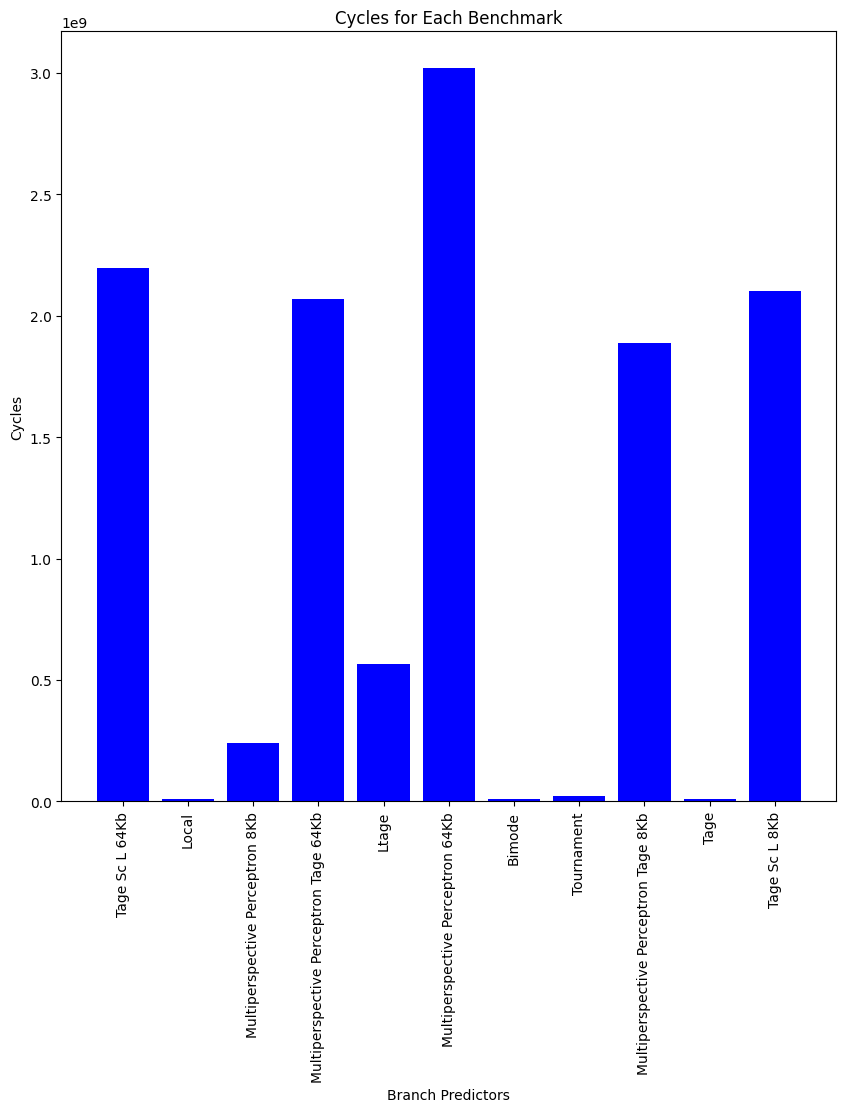

In [147]:
plot(branchpredictors, cycles, "Cycles")

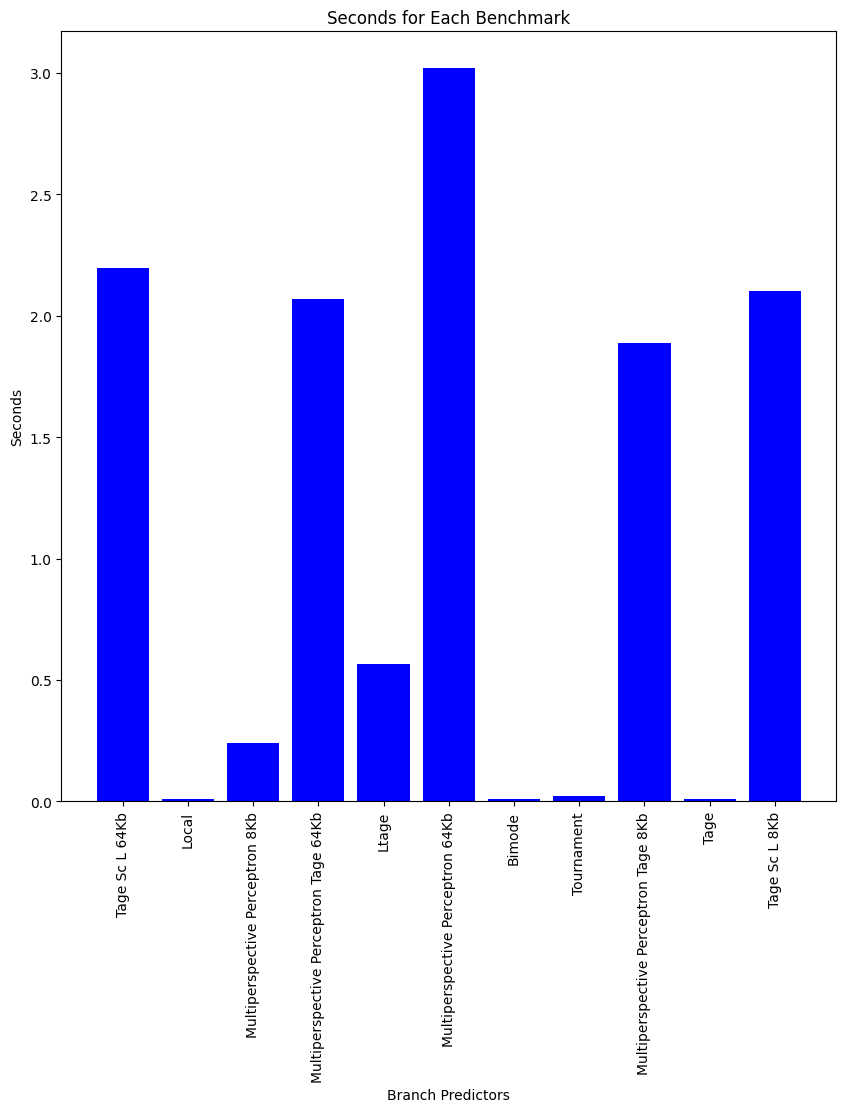

In [148]:
plot(branchpredictors, seconds, "Seconds")

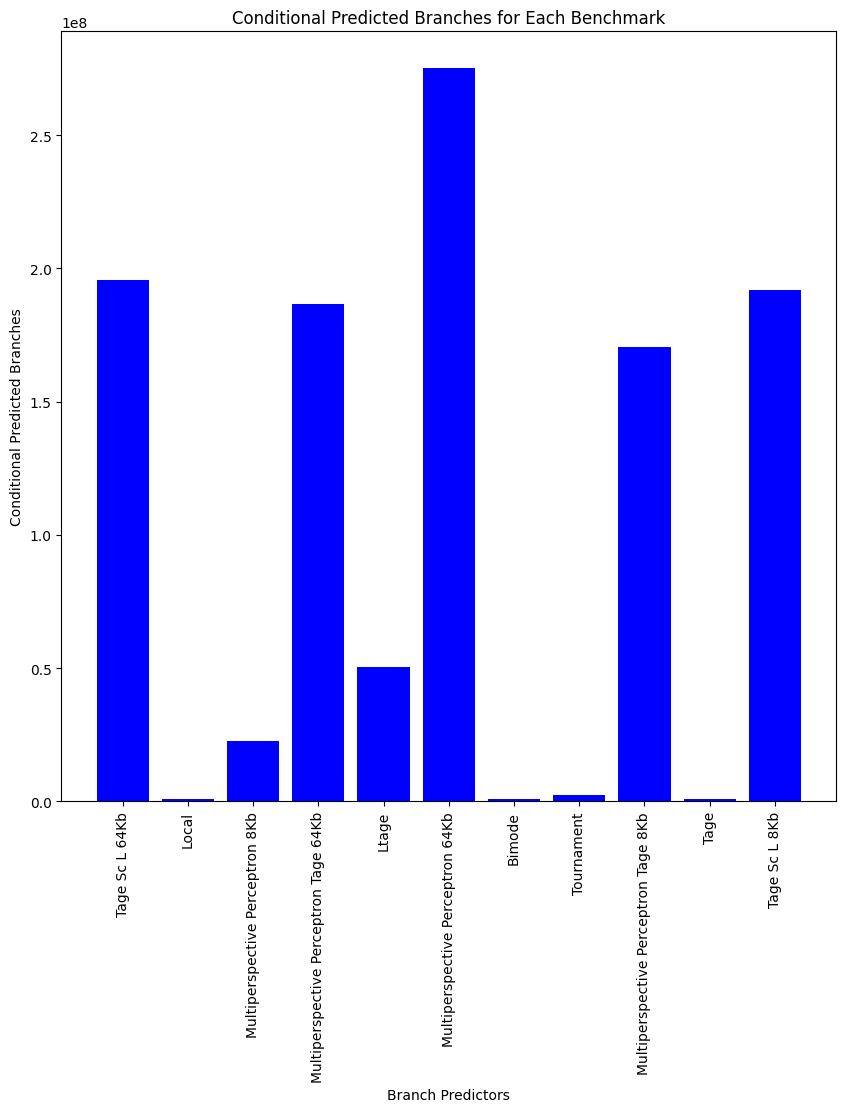

In [149]:
plot(branchpredictors, condPredicted, "Conditional Predicted Branches")

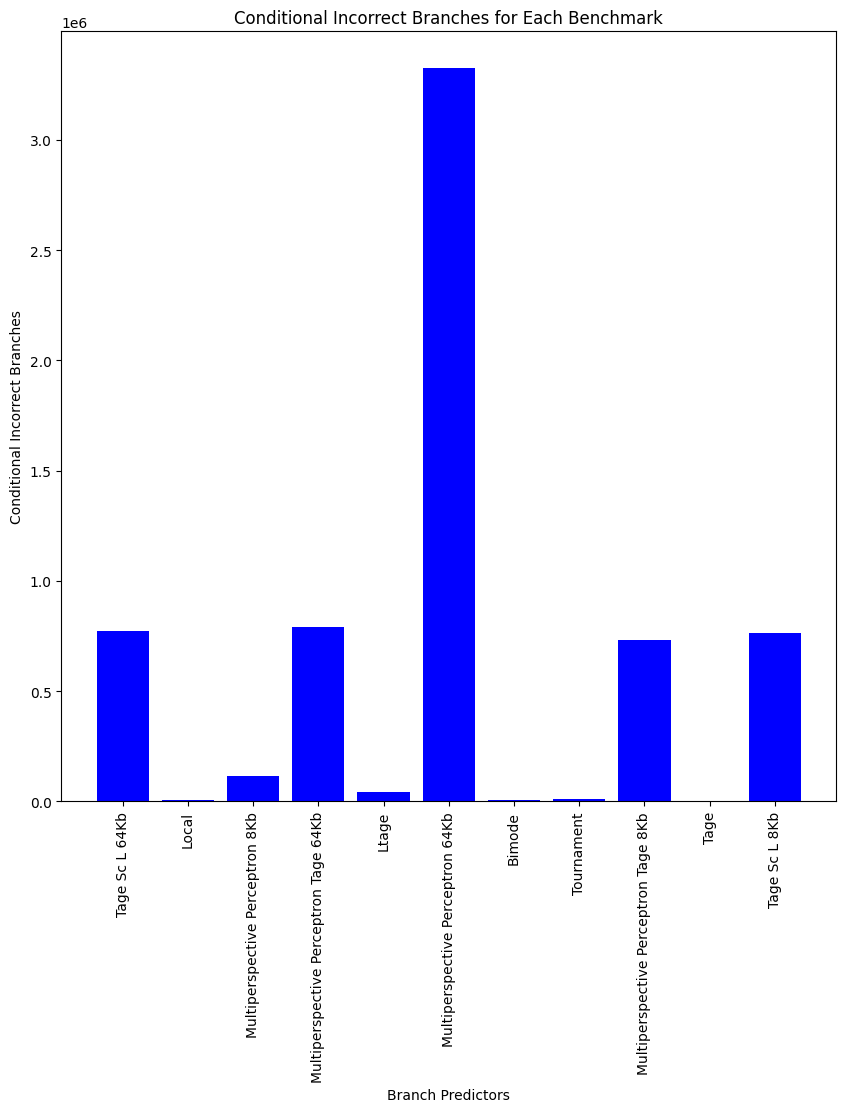

In [150]:
plot(branchpredictors, condIncorrect, "Conditional Incorrect Branches")

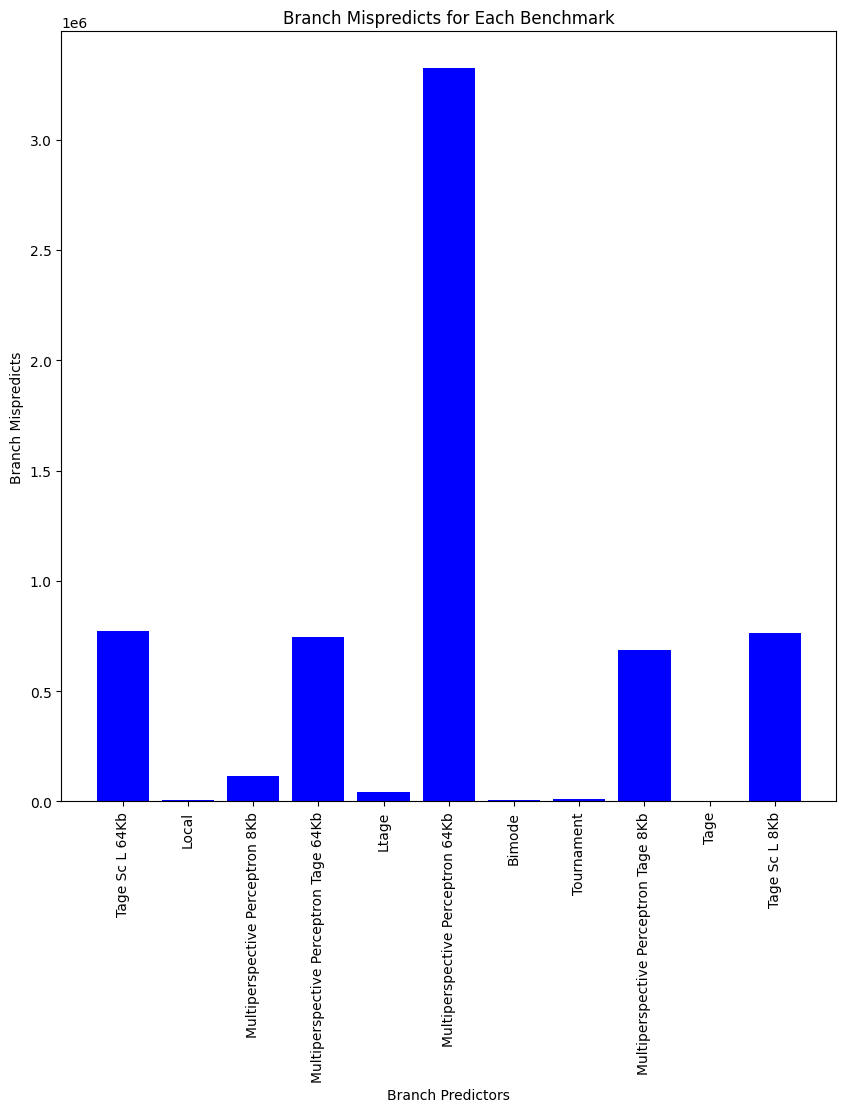

In [151]:
plot(branchpredictors, branchMispredicts, "Branch Mispredicts")

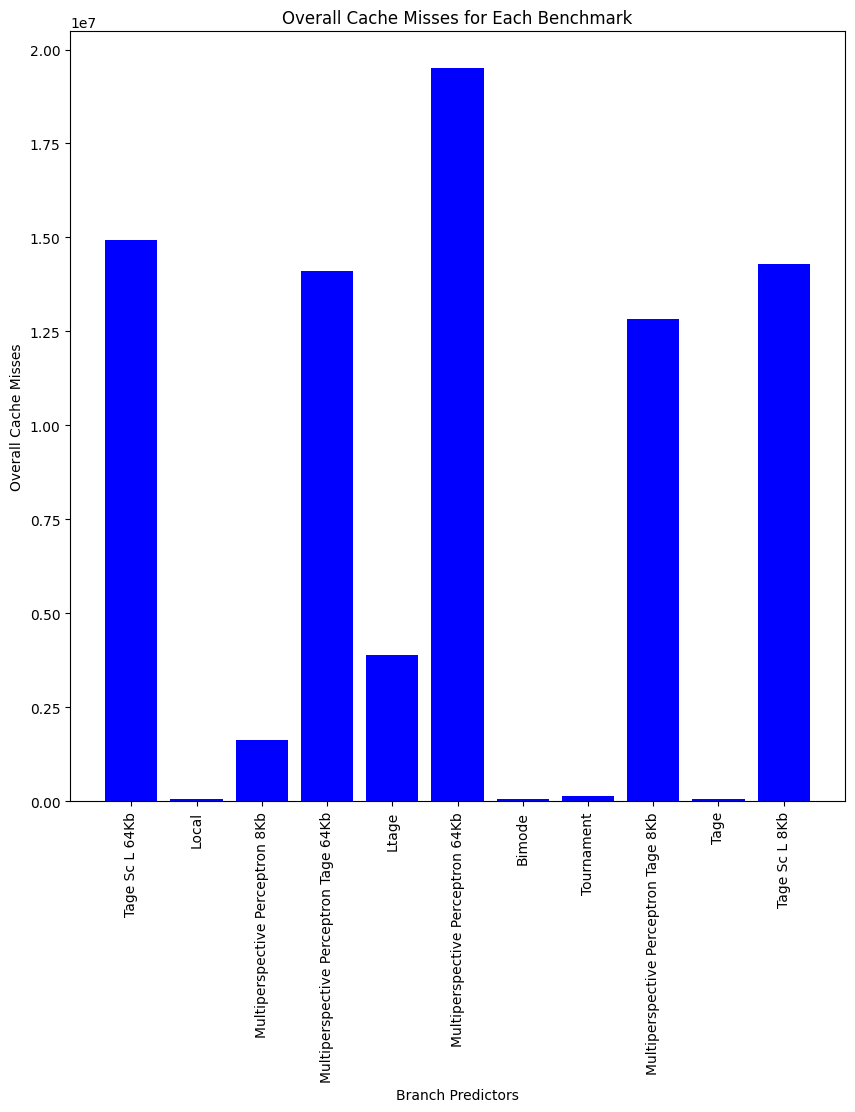

In [152]:
plot(branchpredictors, overallMisses, "Overall Cache Misses")